<a href="https://colab.research.google.com/github/gauravdaga06/Machine-Learning/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

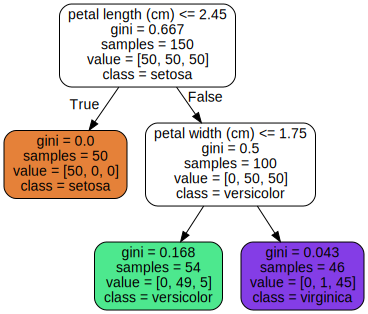

In [3]:

from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

Saving figure decision_tree_decision_boundaries_plot


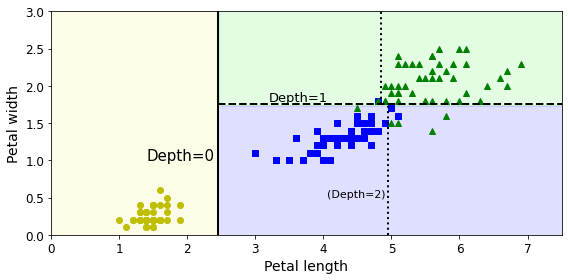

In [4]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
  x1s = np.linspace(axes[0],axes[1],100)
  x2s = np.linspace(axes[2],axes[3],100)
  x1,x2 = np.meshgrid(x1s,x2s)
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)
  custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
  if not iris:
      custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
      plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)  
  if plot_training:
      plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
      plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
      plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
      plt.axis(axes)
  if iris:
      plt.xlabel("Petal length", fontsize=14)
      plt.ylabel("Petal width", fontsize=14)
  else:
      plt.xlabel(r"$x_1$", fontsize=18)
      plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  if legend:
      plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

save_fig("decision_tree_decision_boundaries_plot")
plt.show()



In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

# Regularization Hyperparameters

In [6]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

xm,ym = make_moons(n_samples=100,shuffle=True, noise=0.25, random_state=42)
print(xm,ym)

[[ 1.67746885 -0.58182293]
 [ 0.13745149  0.63475669]
 [ 0.76836917 -0.30940669]
 [-1.19137866  0.22565763]
 [-0.58182043  0.03413363]
 [-0.56391227  1.02973965]
 [ 0.27407116  0.56610994]
 [ 1.42707636 -0.45874816]
 [ 0.91836231  0.78214112]
 [ 0.80507453 -0.21097409]
 [ 0.36714988  0.67302321]
 [-0.30774278  0.91011311]
 [ 1.56235903 -0.75165184]
 [-0.71390452  0.96112853]
 [ 2.05626438  0.52627159]
 [ 1.37302499  0.45958785]
 [ 1.16928784 -0.27122152]
 [ 1.00701939 -0.56622326]
 [ 0.34774329  0.63847067]
 [-0.16412302  0.86198951]
 [-0.14256648  0.09494725]
 [ 1.94246677 -0.21216955]
 [ 0.11645728  0.66754806]
 [-1.11854511  0.30722293]
 [ 0.32714727  0.29744743]
 [ 0.29805021  1.04889334]
 [-1.00460326  0.41708803]
 [ 2.05688986 -0.05578786]
 [ 0.67240353  0.5089167 ]
 [ 0.62889585 -0.69280413]
 [ 1.03312771  0.89947512]
 [-1.10223152  0.10683589]
 [ 1.93274382 -0.6384512 ]
 [-0.13801527  1.46857071]
 [ 2.41817545 -0.36024481]
 [ 0.75839901  0.35727306]
 [ 0.15113819 -0.52220444]
 

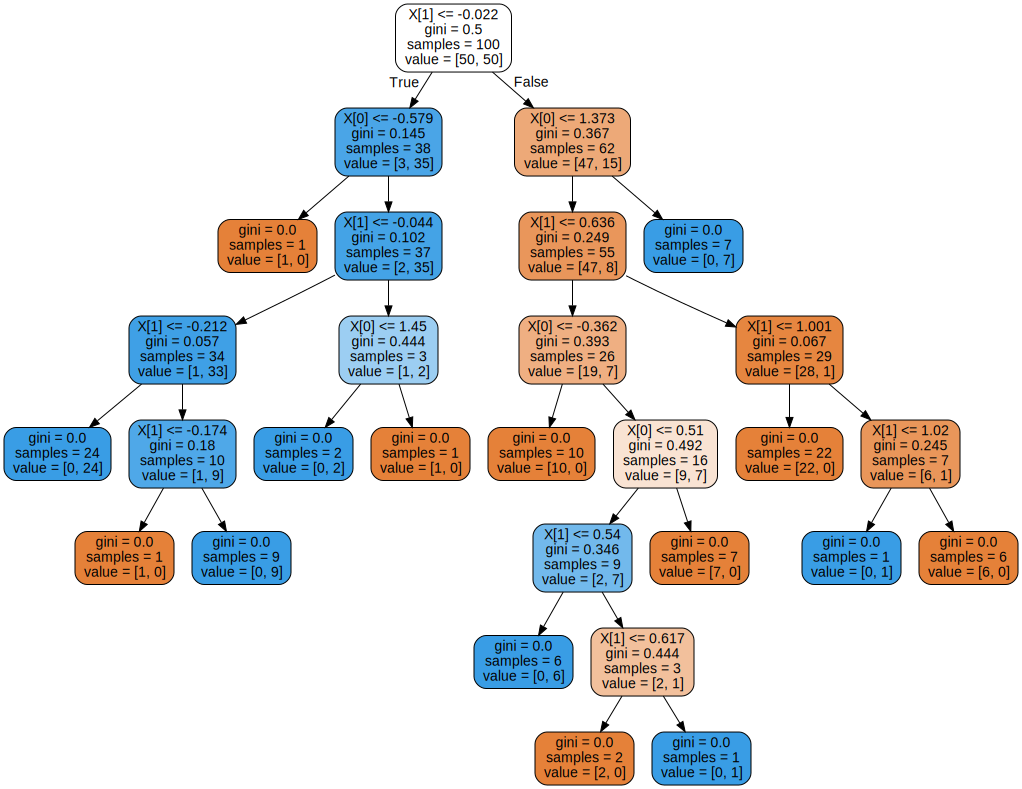

In [7]:
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4,random_state=42)
tree_clf1.fit(xm, ym)
tree_clf2.fit(xm, ym)

export_graphviz(
        tree_clf1,
        out_file=os.path.join(IMAGES_PATH, "make_moons_tree1.dot"),
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "make_moons_tree1.dot"))



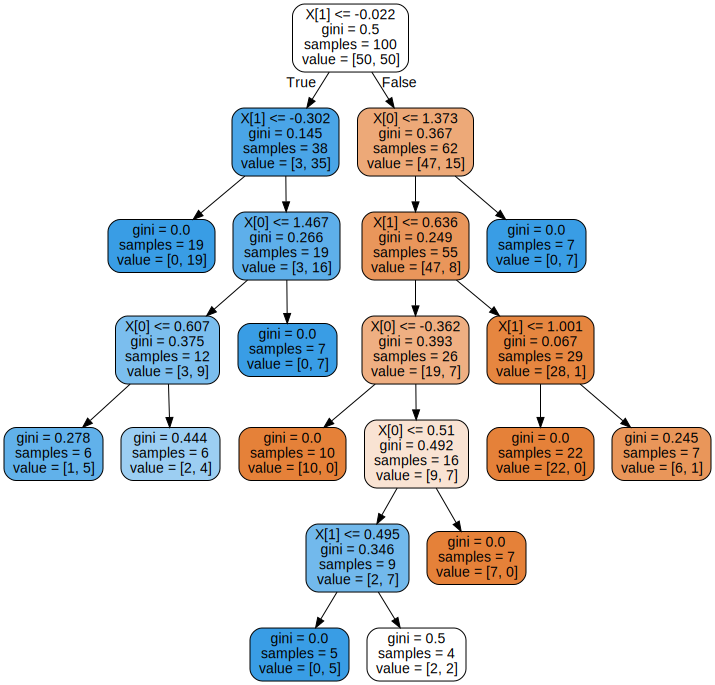

In [8]:
export_graphviz(
        tree_clf2,
        out_file=os.path.join(IMAGES_PATH, "make_moons_tree2.dot"),
        rounded=True,
        filled=True
    )


Source.from_file(os.path.join(IMAGES_PATH, "make_moons_tree2.dot"))

Saving figure min_samples_leaf_plot


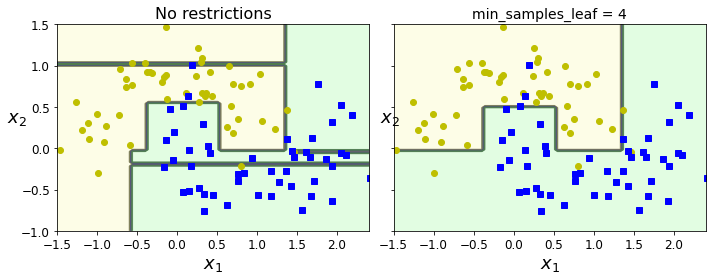

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, xm, ym,axes=[-1.5, 2.4, -1, 1.5],iris=False)
plt.title("No restrictions", fontsize=16)

plt.sca(axes[1])
plot_decision_boundary(tree_clf2, xm, ym,axes=[-1.5, 2.4, -1, 1.5],iris=False)
plt.title("min_samples_leaf = {}".format(tree_clf2.min_samples_leaf), fontsize=14)

save_fig("min_samples_leaf_plot")
plt.show()

In [10]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [11]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

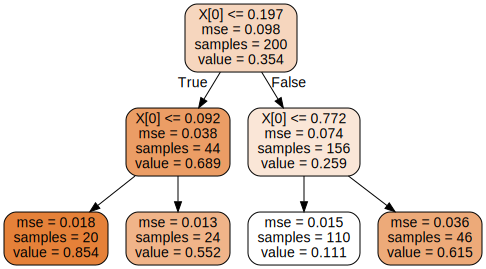

In [12]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_reg,
        out_file=os.path.join(IMAGES_PATH, "poly_tree.dot"),
        rounded=True,
        filled=True
    )

Source.from_file(os.path.join(IMAGES_PATH, "poly_tree.dot"))

<function matplotlib.pyplot.show>

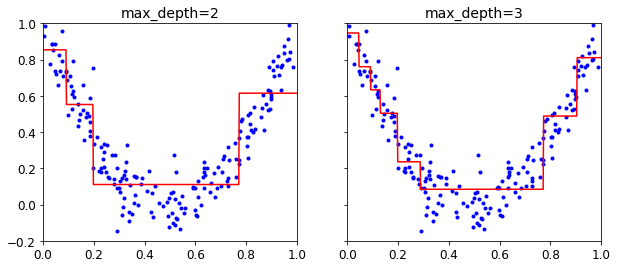

In [13]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1]):
  x1 = np.linspace(axes[0],axes[1],500).reshape(-1,1)
  y_pred = tree_reg.predict(x1)
  plt.axis(axes)
  plt.plot(X,y,'b.')
  plt.plot(x1,y_pred,'r-')

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
plt.title("max_depth=2", fontsize=14)


plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y)
plt.title("max_depth=3", fontsize=14)

plt.show


No handles with labels found to put in legend.


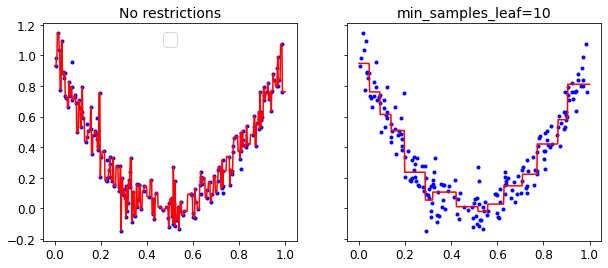

In [14]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y1_pred = tree_reg1.predict(x1)
y2_pred = tree_reg2.predict(x1) 

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plt.plot(X,y,'b.')
plt.plot(x1,y1_pred,'r-')
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)


plt.sca(axes[1])
plt.plot(X,y,'b.')
plt.plot(x1,y2_pred,'r-')
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()